# Clustering models for weekly sales transaction data set

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)



import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the weekly sales transaction dataset
sales_transac = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

In [3]:
# Exploring the dataset: viewing the first few observations
sales_transac.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [4]:
# Exploring the dataset: viewing the last few observations
sales_transac.tail()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00
810,P819,0,1,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33


In [6]:
#dropping columns not required for clustering 
sales_transac = sales_transac.drop(sales_transac.iloc[:,53:], axis=1).iloc[:,1:]
sales_transac

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,1,0,0,2,1,0,0,1,...,0,1,1,0,0,1,0,0,2,0
807,0,1,0,0,1,2,2,6,0,1,...,3,3,4,2,4,5,5,5,6,5
808,1,0,0,0,1,1,2,1,1,0,...,2,0,0,2,2,0,0,0,4,3
809,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,2,0


In [13]:
# Exploring the dataset: viweing the number of rows and columns of the dataset
sales_transac.shape

(811, 51)

In [7]:
# Exploring the dataset: understaing the data type of each feature
sales_transac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W0      811 non-null    int64
 1   W1      811 non-null    int64
 2   W2      811 non-null    int64
 3   W3      811 non-null    int64
 4   W4      811 non-null    int64
 5   W5      811 non-null    int64
 6   W6      811 non-null    int64
 7   W7      811 non-null    int64
 8   W8      811 non-null    int64
 9   W9      811 non-null    int64
 10  W10     811 non-null    int64
 11  W11     811 non-null    int64
 12  W12     811 non-null    int64
 13  W13     811 non-null    int64
 14  W14     811 non-null    int64
 15  W15     811 non-null    int64
 16  W16     811 non-null    int64
 17  W17     811 non-null    int64
 18  W18     811 non-null    int64
 19  W19     811 non-null    int64
 20  W20     811 non-null    int64
 21  W21     811 non-null    int64
 22  W22     811 non-null    int64
 23  W23     811 non

In [8]:
# Descriptive statistics to further have insight into the dataset and spot things like an outlier for instance
sales_transac.describe()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,8.394575,8.318126,8.434032,8.556104,8.720099,8.670777,8.674476,8.895191,8.861899,8.889026
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,11.348777,11.250455,11.223499,11.382041,11.621684,11.435870,11.222996,10.941375,10.492710,9.558011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,10.000000,11.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,13.000000,14.000000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,52.000000,50.000000,46.000000,46.000000,55.000000,49.000000,50.000000,52.000000,57.000000,73.000000


In [22]:
# Exploring the dataset: checking for missing value
sales_transac.isnull().sum()

W0     0
W1     0
W2     0
W3     0
W4     0
W5     0
W6     0
W7     0
W8     0
W9     0
W10    0
W11    0
W12    0
W13    0
W14    0
W15    0
W16    0
W17    0
W18    0
W19    0
W20    0
W21    0
W22    0
W23    0
W24    0
W25    0
W26    0
W27    0
W28    0
W29    0
W30    0
W31    0
W32    0
W33    0
W34    0
W35    0
W36    0
W37    0
W38    0
W39    0
W40    0
W41    0
W42    0
W43    0
W44    0
W45    0
W46    0
W47    0
W48    0
W49    0
W50    0
W51    0
dtype: int64

<AxesSubplot:>

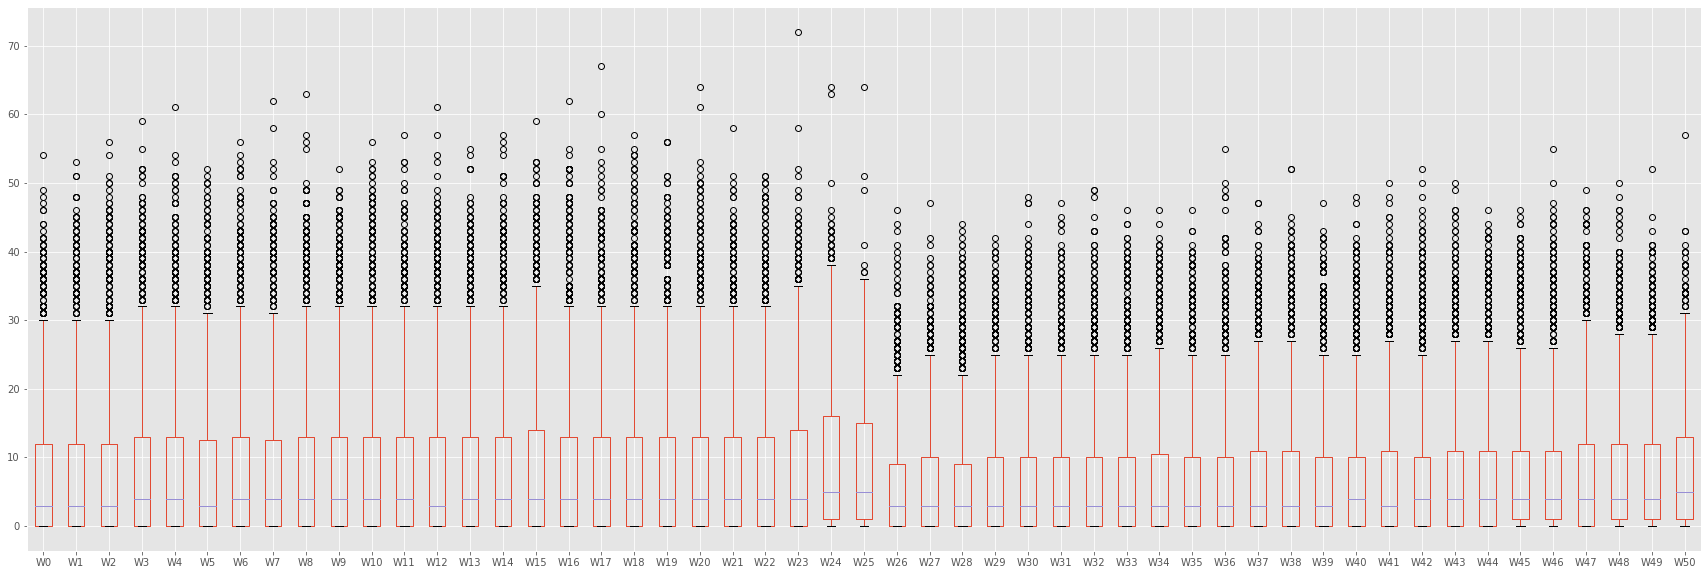

In [82]:
# Exploring dataset: checking for outlier
sales_transac.boxplot(figsize=(30, 10))

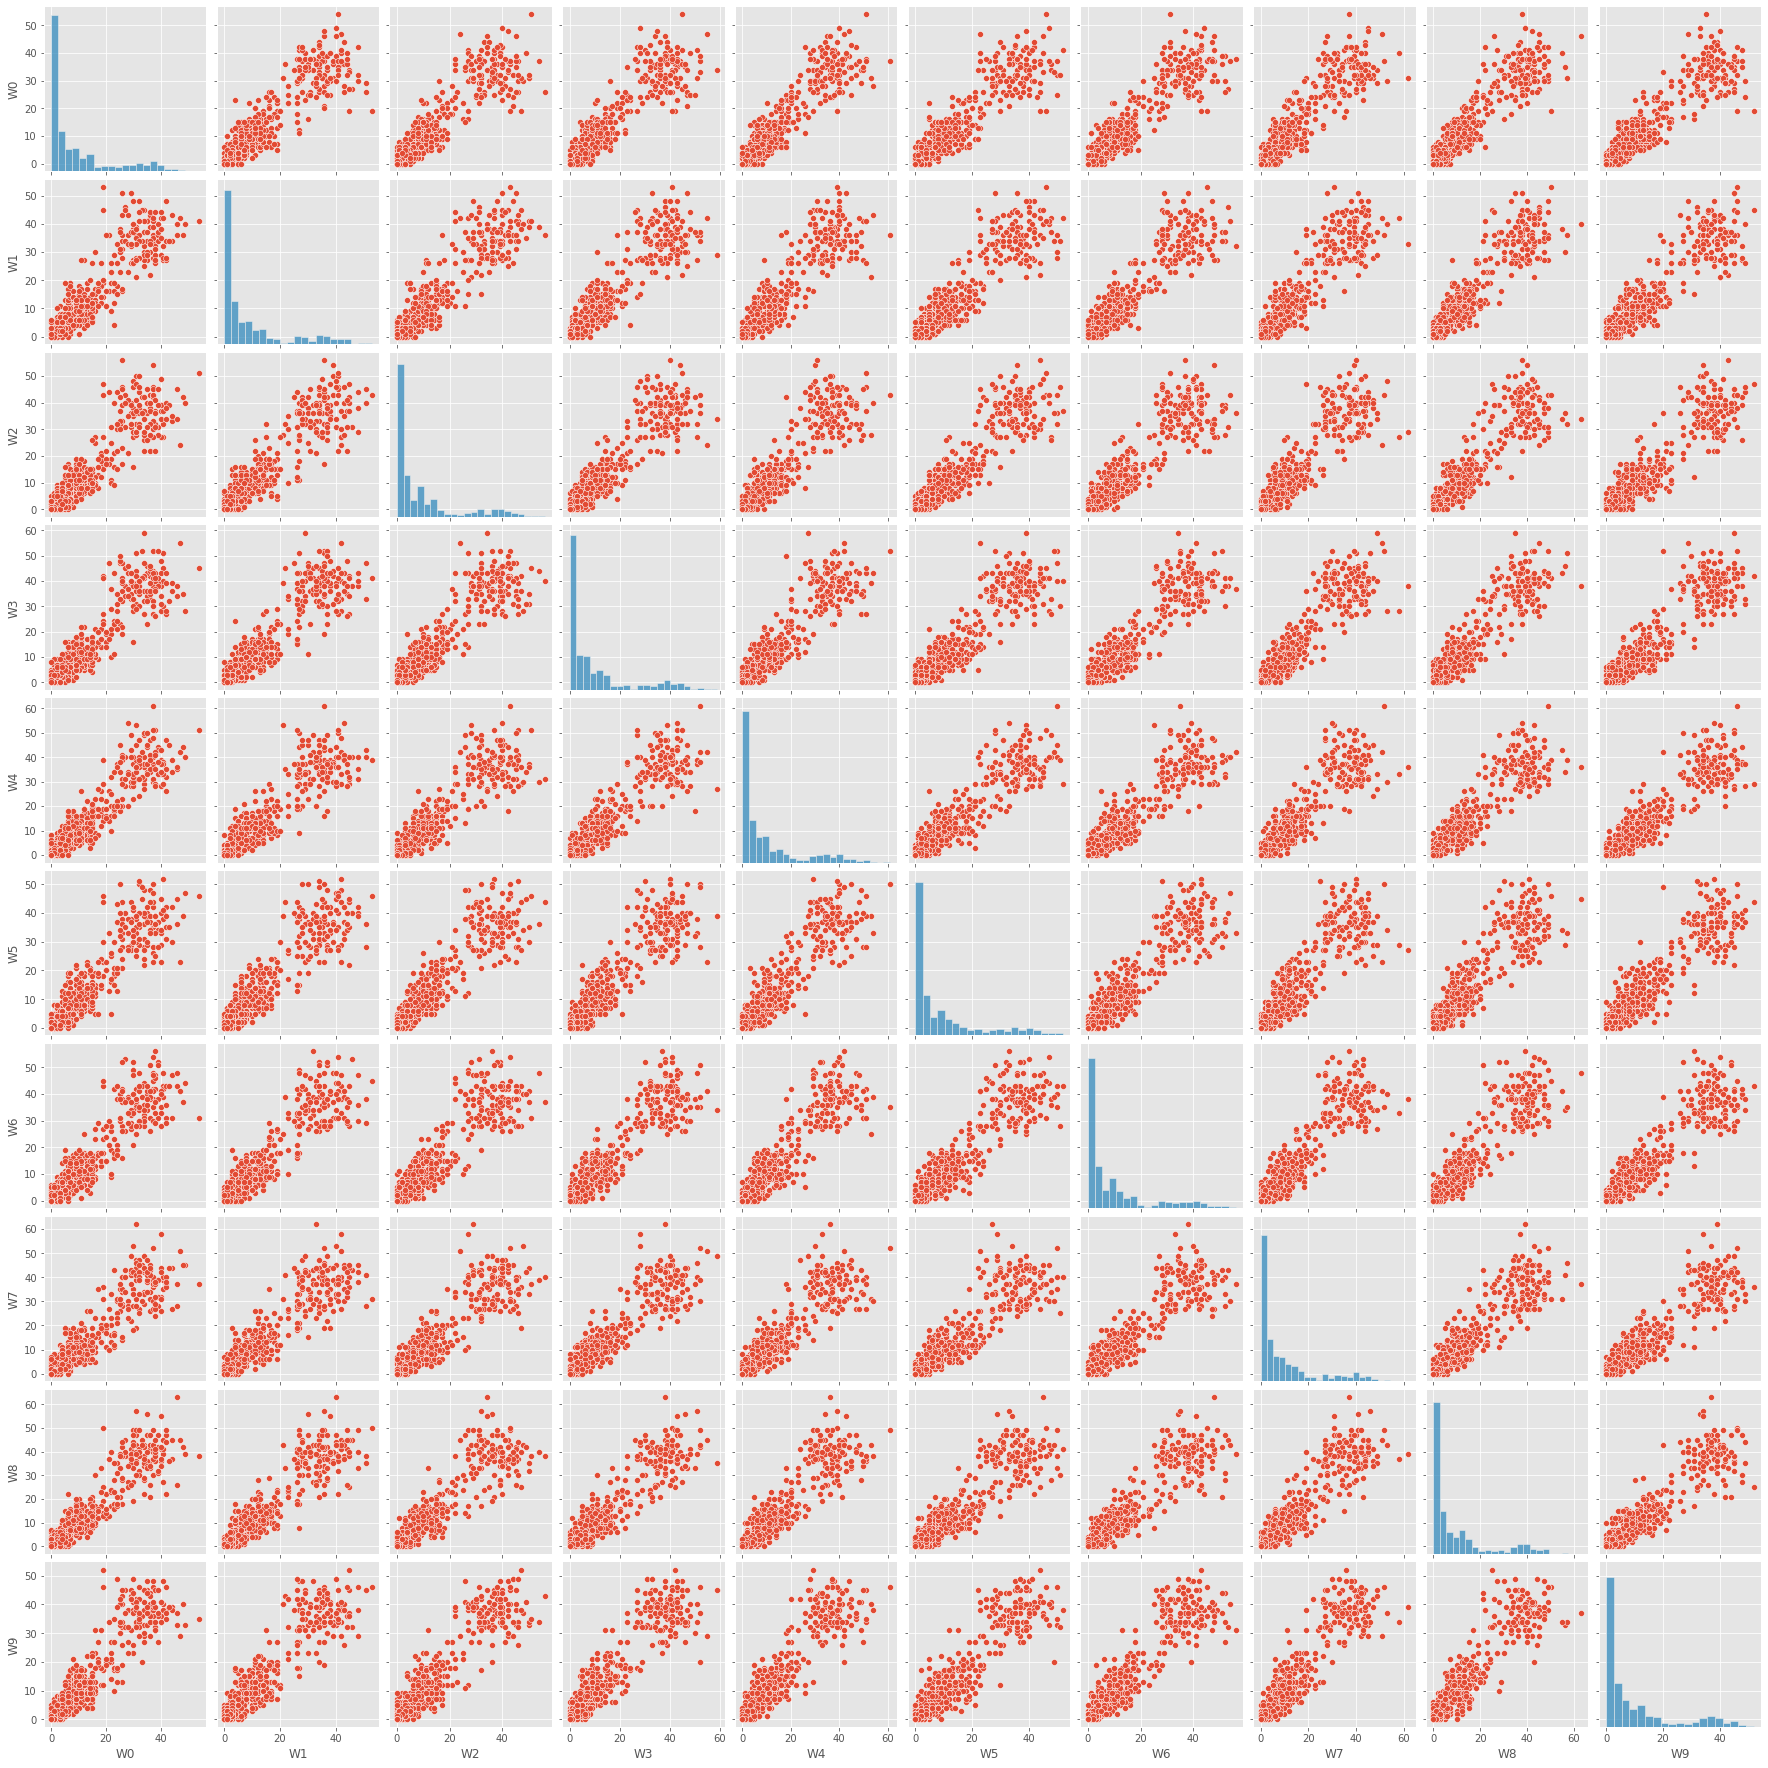

In [26]:
# Exploring the dataset: Viewing the pair distribution of the first 10 variables
sns.pairplot(sales_transac.iloc[:,0:10])


In [5]:
#  Normalizing the data to avoid the dominance of observations with higher magnitude during training
scaler = MinMaxScaler()
X= scaler.fit_transform(sales_transac)

Text(0.5, 1.0, 'The Elbow Method for determining optimal value of K')

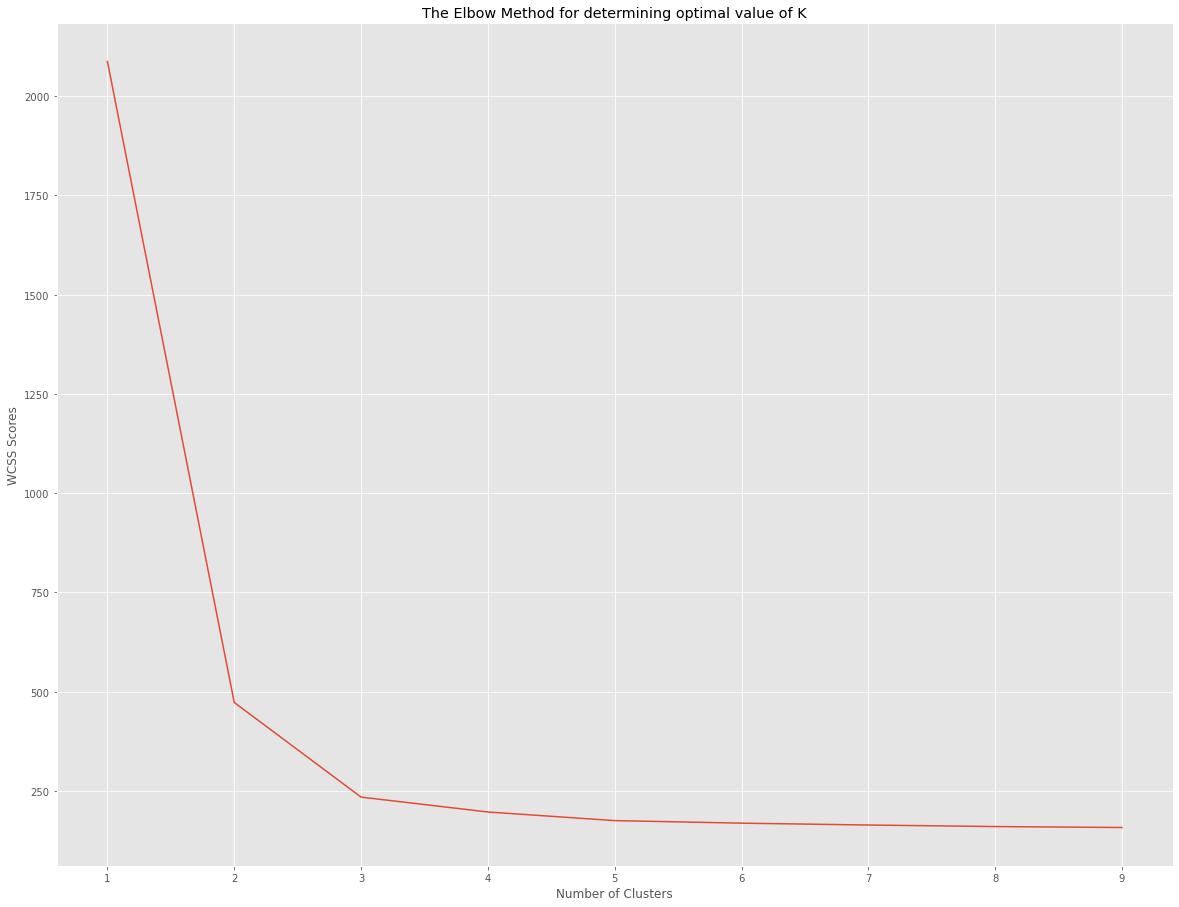

In [27]:
# Determining the optimal value of K using the Elbow approach
wcss = []
clusters = range(1, 10)
for i in clusters:
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    wcss.append(inertia)
fig, ax = plt.subplots(1, figsize=(20, 15.5))
no_of_clusters = np.arange(len(clusters))
ax.plot(no_of_clusters, wcss)
ax.set_xticks(no_of_clusters)
ax.set_xticklabels(clusters, rotation='horizontal')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Scores')
plt.title('The Elbow Method for determining optimal value of K')

# K-means Algorithm

In [6]:
# k-means model for sales transaction dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=100)
y_kmeans = kmeans.fit_predict(X)

In [51]:
# fitting the pca model on the dataset to reduce to 2 principle components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
sum(pca.explained_variance_ratio_)

0.9300616757161029

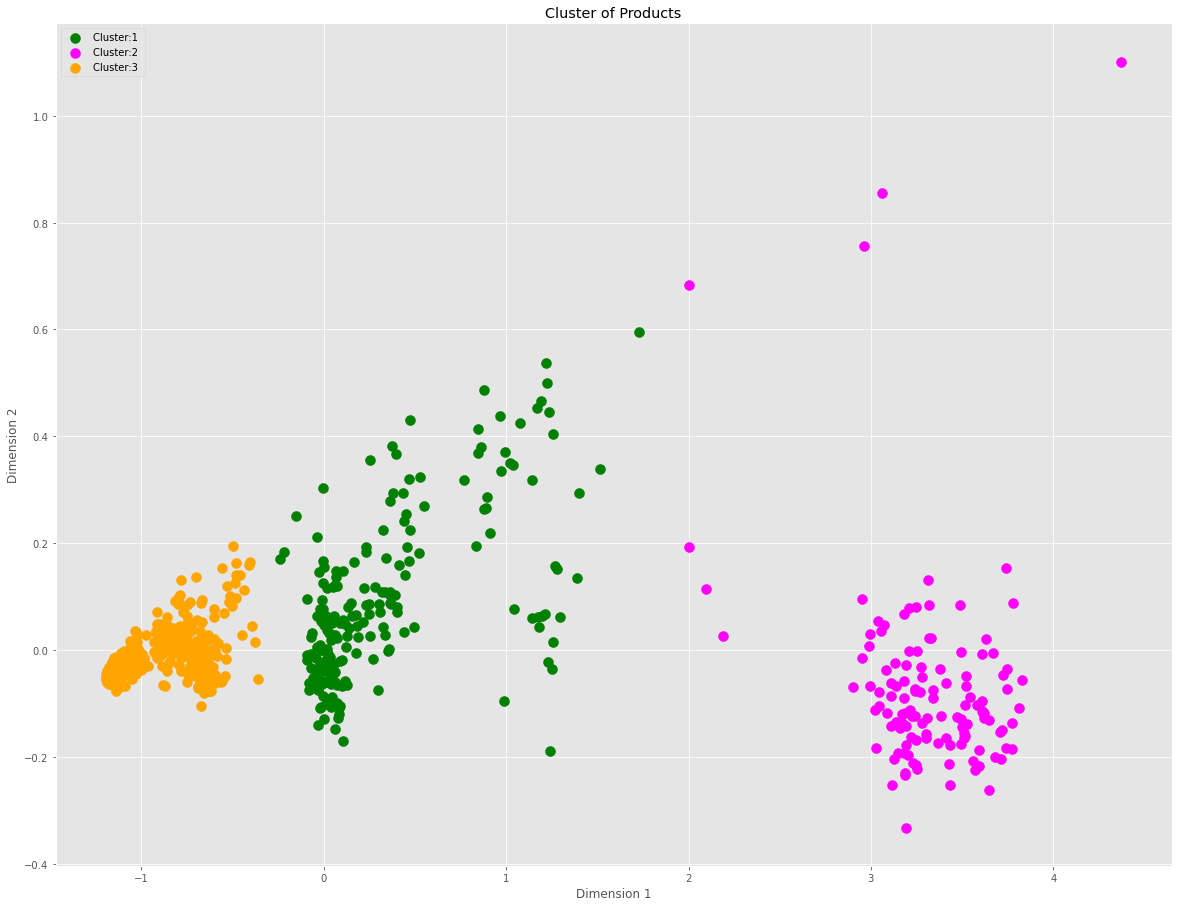

In [63]:
# viewing the clusters
colours = ['green','magenta', 'orange']
plt.figure(figsize=(20,15.5))
for i in range(0,3):
    plt.scatter(X_pca[y_kmeans==i, 0], X_pca[y_kmeans==i,1],
               s = 100, c = colours[i], label = 'Cluster:{} '.format(i+1))

plt.title('Cluster of Products')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [16]:
# counting the number of products in each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = counts.reshape(1,3)
cluster_count = pd.DataFrame(counts, columns=['Cluster 0', 'Cluster 1', 'Cluster 2'])
cluster_count

,Cluster 0,Cluster 1,Cluster 2
0,197,124,490


In [17]:
# adding the lebel generated from the kmeans model to the original sales transaction data 
#to view which cluster each product belongs to

sales_transac['Label'] = pd.DataFrame(kmeans.labels_)

sales_transac

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,...,W43,W44,W45,W46,W47,W48,W49,W50,W51,Label
0,12,10,8,13,12,14,21,6,14,11,...,7,8,10,12,3,7,6,5,10,0
1,6,3,2,7,1,6,3,3,3,2,...,4,5,1,1,4,5,1,6,0,2
2,11,8,9,10,8,7,13,12,6,14,...,14,5,5,7,8,14,8,8,7,0
3,8,13,5,9,6,9,13,13,11,8,...,10,3,4,6,8,14,8,7,8,0
4,5,13,11,6,7,9,14,9,9,11,...,11,7,12,6,6,5,11,8,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,1,0,0,2,1,0,0,1,0,...,1,1,0,0,1,0,0,2,0,2
807,1,0,0,1,2,2,6,0,1,0,...,3,4,2,4,5,5,5,6,5,2
808,0,0,0,1,1,2,1,1,0,0,...,0,0,2,2,0,0,0,4,3,2
809,0,0,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,2,0,2


# Agglomerative Algorithm

Text(0, 0.5, 'Euclidean distances')

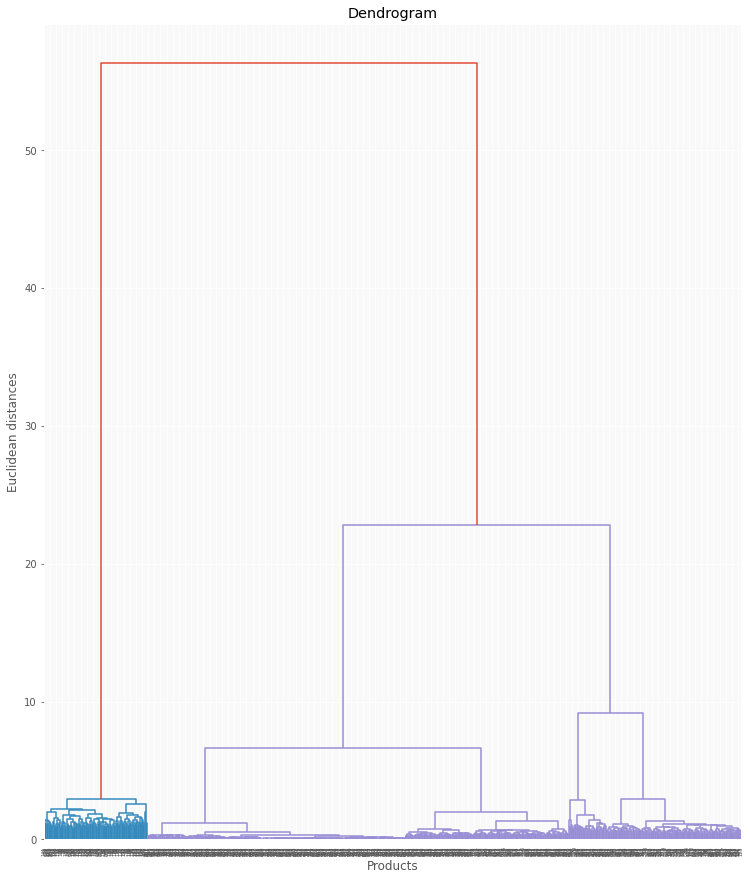

In [57]:
# determining the optimal number of clusters using the dendrogram
plt.figure(figsize=(12.5, 15))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Products')
plt.ylabel('Euclidean distances')

In [11]:
# agglomerative model for sales transaction dataset
agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_agglo = agglo.fit_predict(X)

In [60]:
# fitting the pca model on the dataset to reduce to 2 principle components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
sum(pca.explained_variance_ratio_)

0.9300616757143302

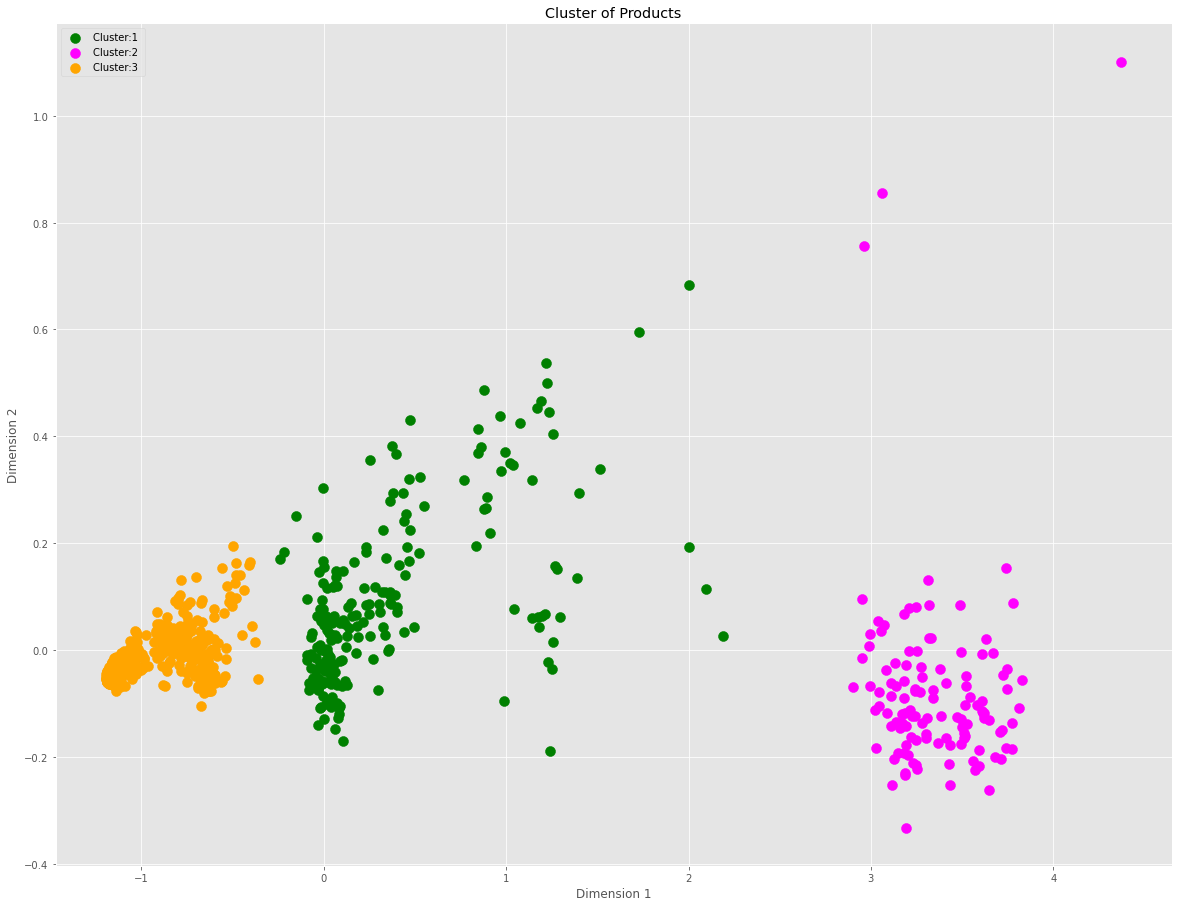

In [61]:
# viewing the clusters
colours = ['green','magenta', 'orange']
plt.figure(figsize=(20,15.5))
for i in range(0,3):
    plt.scatter(X_pca[y_agglo==i, 0], X_pca[y_agglo==i,1],
               s = 100, c = colours[i], label = 'Cluster:{} '.format(i+1))

plt.title('Cluster of Products')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [65]:
#counting the number of products in each cluster
unique, counts = np.unique(agglo.labels_, return_counts=True)
counts = counts.reshape(1,3)
cluster_count = pd.DataFrame(counts, columns=['Cluster 0', 'Cluster 1', 'Cluster 2'])
cluster_count

,Cluster 0,Cluster 1,Cluster 2
0,201,120,490


In [66]:
# adding the lebel generated from the kmeans model to the original sales transaction data 
#to view which cluster each product belongs to

sales_transac['Label'] = pd.DataFrame(agglo.labels_)

sales_transac

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W43,W44,W45,W46,W47,W48,W49,W50,W51,Label
0,11,12,10,8,13,12,14,21,6,14,...,7,8,10,12,3,7,6,5,10,0
1,7,6,3,2,7,1,6,3,3,3,...,4,5,1,1,4,5,1,6,0,2
2,7,11,8,9,10,8,7,13,12,6,...,14,5,5,7,8,14,8,8,7,0
3,12,8,13,5,9,6,9,13,13,11,...,10,3,4,6,8,14,8,7,8,0
4,8,5,13,11,6,7,9,14,9,9,...,11,7,12,6,6,5,11,8,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,1,0,0,2,1,0,0,1,...,1,1,0,0,1,0,0,2,0,2
807,0,1,0,0,1,2,2,6,0,1,...,3,4,2,4,5,5,5,6,5,2
808,1,0,0,0,1,1,2,1,1,0,...,0,0,2,2,0,0,0,4,3,2
809,0,0,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,2,0,2


# interpreting each cluster

In [35]:
# interpreting cluster 0
sales_transac_0 = sales_transac[sales_transac['Label']==0]
sales_transac_0['mean_sales'] = sales_transac[sales_transac['Label']==0].mean(axis=1)
sales_transac_0

# the mean sales for each product in this cluster shows a relative medium sales values

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,...,W44,W45,W46,W47,W48,W49,W50,W51,Label,mean_sales
0,12,10,8,13,12,14,21,6,14,11,...,8,10,12,3,7,6,5,10,0,9.423077
2,11,8,9,10,8,7,13,12,6,14,...,5,5,7,8,14,8,8,7,0,8.557692
3,8,13,5,9,6,9,13,13,11,8,...,3,4,6,8,14,8,7,8,0,8.038462
4,5,13,11,6,7,9,14,9,9,11,...,7,12,6,6,5,11,8,9,0,8.307692
7,6,10,9,6,8,7,5,10,10,8,...,4,8,8,6,7,4,9,9,0,8.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,7,10,18,21,8,7,12,13,15,12,...,9,18,10,14,15,19,20,20,0,12.538462
637,20,15,11,10,20,18,12,18,11,17,...,10,20,19,15,18,22,26,18,0,16.403846
669,4,8,7,2,6,5,3,3,8,6,...,7,12,10,9,15,9,12,20,0,7.250000
772,13,15,15,16,17,14,15,15,19,19,...,19,12,11,20,20,17,20,30,0,16.269231


In [36]:
# inyterpreting cluster 1
sales_transac_1 = sales_transac[sales_transac['Label']==1]
sales_transac_1['mean_sales'] = sales_transac[sales_transac['Label']==1].mean(axis=1)
sales_transac_1

# the mean sales for each product in this cluster shows a relative high sales values

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,...,W44,W45,W46,W47,W48,W49,W50,W51,Label,mean_sales
14,45,47,42,29,44,43,36,25,52,39,...,33,30,37,30,30,34,38,20,1,34.365385
15,27,27,43,29,32,49,41,49,38,42,...,33,39,42,45,31,31,23,22,1,35.500000
16,40,40,28,40,47,44,45,39,33,39,...,36,35,43,28,30,30,26,25,1,33.019231
17,38,39,38,39,33,28,44,36,36,23,...,29,41,35,22,28,29,29,23,1,31.596154
18,31,45,36,31,28,28,34,42,40,43,...,24,32,36,30,33,29,27,29,1,31.961538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,31,31,41,41,36,37,27,40,34,45,...,30,34,31,33,25,36,19,22,1,31.442308
617,27,37,29,34,39,28,28,30,32,38,...,27,25,27,34,27,37,31,19,1,30.057692
618,33,29,38,36,27,38,62,39,39,38,...,37,42,28,35,27,31,25,30,1,32.076923
619,33,39,40,40,37,37,37,26,42,34,...,40,31,39,21,37,40,27,25,1,32.019231


In [37]:
# interpreting cluster 2
sales_transac_2 = sales_transac[sales_transac['Label']==2]
sales_transac_2['mean_sales'] = sales_transac[sales_transac['Label']==2].mean(axis=1)
sales_transac_2

# the mean sales for each product in this cluster shows a relative low sales values

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,...,W44,W45,W46,W47,W48,W49,W50,W51,Label,mean_sales
1,6,3,2,7,1,6,3,3,3,2,...,5,1,1,4,5,1,6,0,2,3.884615
5,3,2,7,6,3,8,6,6,3,1,...,4,3,6,5,3,3,10,6,2,4.211538
6,8,3,7,8,7,2,3,10,3,5,...,3,6,2,6,2,4,2,1,2,4.057692
11,4,1,6,4,3,7,3,5,3,5,...,4,5,1,3,2,4,6,3,2,3.884615
22,5,4,3,3,2,5,4,5,5,7,...,4,5,2,1,6,2,4,0,2,4.115385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,1,0,0,2,1,0,0,1,0,...,1,0,0,1,0,0,2,0,2,0.480769
807,1,0,0,1,2,2,6,0,1,0,...,4,2,4,5,5,5,6,5,2,2.769231
808,0,0,0,1,1,2,1,1,0,0,...,0,2,2,0,0,0,4,3,2,0.519231
809,0,0,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,2,0,2,0.365385


# Comparing clustering performance

In [38]:
from sklearn.metrics import silhouette_score
# silhouette score for kmeans
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhoutte Score: %.3f'%score)

Silhoutte Score: 0.614


In [39]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, agglo.labels_, metric='euclidean')
print('Silhoutte Score: %.3f'%score)

Silhoutte Score: 0.613
